# Análise de Desempenho de Algoritmos de Pesquisa



# Módulo Pesquisa

Neste módulo, iremos desenvolver um conjunto de funções para realizar pesquisas em listas de números por forma a testar o desempenho de algoritmos de pesquisa.

1. `Pesquisa Sequencial`: Um método simples que percorre a lista um elemento de cada vez até encontrar o valor desejado.
2. `Pesquisa Sequencial Recursiva`: Uma versão recursiva da pesquisa sequencial que utiliza chamadas de função para encontrar o valor desejado.

3. `Pesquisa Binária`: Um algoritmo de pesquisa mais eficiente que funciona em listas ordenadas, dividindo a lista ao meio repetidamente.

4. `Pesquisa Binária Recursiva`: Uma versão recursiva da pesquisa binária que utiliza chamadas de função para encontrar o valor desejado em listas ordenadas.

Essas funções de pesquisa são úteis e podem ter diversas aplicações, desde encontrar elementos num determinado conjunto de dados até otimizar o tempo de busca em listas ordenadas.

In [19]:
def pesquisa_sequencial_lista_ordenada(lista, item):
    """
    Realiza uma pesquisa sequencial numa lista ordenada para encontrar o 'item' desejado.

    Args:
    lista (list): A lista ordenada de números a ser pesquisada.
    item: O número que desejamos encontrar na lista.

    Returns:
    bool: Retorna True se o 'item' for encontrado na lista, False caso contrário.
    """
    encontrado = False
    for elemento in lista:
        if elemento == item:
            encontrado = True
            break
        if elemento > item:
            encontrado = False
            break
    return encontrado

def pesquisa(lista, item):
    """
    Realiza uma pesquisa sequencial recursiva numa lista para encontrar o valor 'n' desejado.

    Args:
    lista (list): A lista de números a ser pesquisada.
    n: O número que desejamos encontrar na lista.

    Returns:
    bool: Retorna True se o valor 'n' for encontrado na lista, False caso contrário.
    """
    if not lista:  # Condição de parada: lista vazia, elemento não encontrado
        return False
    if lista[0] == item:
        return True
    return pesquisa(lista[1:], item)


def pesquisa_binaria(lista, item):
    """
    Realiza uma pesquisa binária numa lista ordenada para encontrar o valor 'item' desejado.

    Args:
    lista (list): A lista ordenada de números a ser pesquisada.
    item: O valor que desejamos encontrar na lista.

    Returns:
    bool: Retorna True se o valor 'item' for encontrado na lista, False caso contrário.
    """
    primeiro = 0
    ultimo = len(lista) - 1
    while primeiro <= ultimo:
        meio = (primeiro + ultimo) // 2
        if lista[meio] == item:
            return True
        else:
            if item < lista[meio]:
                ultimo = meio - 1
            else:
                primeiro = meio + 1
    return False


def pesquisa_binaria_recursiva(lista, item):
    """
    Realiza uma pesquisa binária recursiva numa lista ordenada para encontrar o valor 'item' desejado.

    Args:
    lista (list): A lista ordenada de números a ser pesquisada.
    item: O valor que desejamos encontrar na lista.

    Returns:
    bool: Retorna True se o valor 'item' for encontrado na lista, False caso contrário.
    """
    if len(lista) == 0:
        return False
    else:
        meio = len(lista) // 2
        if lista[meio] == item:
            return True
        else:
            if item < lista[meio]:
                return pesquisa_binaria_recursiva(lista[:meio], item)
            else:
                return pesquisa_binaria_recursiva(lista[meio + 1:], item)





# Módulo Análise de Complexidade

Neste módulo, iremos desenvolver um conjunto de funções para avaliar o desempenho de outras funções. Teremos quatro funções principais:

1. `f_tempo`: Calcula o tempo médio e desvio padrão de execução de uma função com base num número de repetições.

2. `f_boxplot`: Desenha um boxplot dos tempos de execução.

3. `f_complexidade`: Avalia a complexidade de uma função em diferentes inputs, fornecendo médias e desvios padrão.

4. `f_complexidade_boxplot`: Gera um gráfico de tempo médio de execução em função dos inputs.





In [13]:
import time
import statistics
import matplotlib.pyplot as plt

def f_tempo(funcao, entrada, n_vezes, *args):
    """
    Calcula o tempo médio e desvio padrão de execução de uma função.

    Args:
        funcao: A função a ser analisada.
        entrada: Um input para a função.
        n_vezes: O número de vezes que a função deve ser executada.

    Returns:
        tempos_execucao: Uma lista dos tempos de execução individuais.
        tempo_medio: O tempo médio de execução.
        desvio_padrao: O desvio padrão do tempo de execução.
    """
    tempos_execucao = []
    for _ in range(n_vezes):
        start_time = time.time()
        funcao(entrada, *args)
        end_time = time.time()
        tempos_execucao.append(end_time - start_time)

    tempo_medio = statistics.mean(tempos_execucao)
    desvio_padrao = statistics.stdev(tempos_execucao)

    return tempos_execucao, tempo_medio, desvio_padrao

def f_boxplot(tempos_execucao):
    """
    Desenha um boxplot dos tempos de execução.

    Args:
        tempos_execucao: Uma lista de tempos de execução.
    """
    plt.boxplot(tempos_execucao)
    plt.show()

def f_complexidade(funcao, lista_inputs, n_vezes, item=None):
    """
    Avalia a complexidade de uma função para diferentes inputs.

    Args:
        funcao: A função a ser analisada.
        lista_inputs: Lista de inputs da função para avaliar o tempo de execução.
        n_vezes: O número de vezes que a função deve ser executada para cada input.
        item: O item a ser pesquisado (opcional).

    Returns:
        dic_stats: Um dicionário com médias e desvios padrão para cada input.
        dic_tempos: Um dicionário com listas de tempos para cada input.
    """
    dic_stats = {}
    dic_tempos = {}

    for entrada in lista_inputs:
        tempos_execucao, tempo_medio, desvio_padrao = f_tempo(funcao, entrada, n_vezes, item)
        dic_stats[entrada] = (tempo_medio, desvio_padrao)
        dic_tempos[entrada] = tempos_execucao

    return dic_stats, dic_tempos

def f_complexidade_boxplot(dic_tempos):
    """
    Gera um gráfico de tempo médio de execução em função dos inputs.

    Args:
        dic_tempos: Um dicionário com listas de tempos de execução para diferentes inputs.
    """
    medias = [statistics.mean(dic_tempos[entrada]) for entrada in dic_tempos]
    inputs = list(dic_tempos.keys())

    plt.plot(inputs, medias, marker='o')
    plt.xlabel('Entradas')
    plt.ylabel('Tempo Médio de Execução')
    plt.show()


# Dados: Criar ficheiros

Neste exemplo iremos criar arquivos com números aleatórios e tamanhos diferentes.

O código é dividido em duas funções principais:
1. `gerar_arquivo_aleatorio`: Gera um ficheiro .txt com números aleatórios compreendidos num intervalo de 0 a 1.000.000.
2. `ordenar_arquivo`: Lê o arquivo de entrada, ordena os números e escreve o resultado no arquivo de saída.




In [5]:
import random
def gerar_arquivo_aleatorio(nome_arquivo, num_registros):
    """
    Gera um arquivo com números aleatórios.

    Args:
        nome_arquivo (str): O nome do arquivo a ser criado.
        num_registros (int): O número de registros a serem gerados e escritos no arquivo.
    """
    with open(nome_arquivo, 'w') as arquivo:
        for _ in range(num_registros):
            num = random.randint(0, 1000000)
            arquivo.write(str(num) + '\n')

def ordenar_arquivo(arquivo_entrada, arquivo_saida):
    """
    Lê um arquivo de entrada, ordena os números e escreve o resultado no arquivo de saída.

    Args:
        arquivo_entrada (str): O nome do arquivo de entrada com números desordenados.
        arquivo_saida (str): O nome do arquivo onde os números ordenados serão gravados.
    """
    with open(arquivo_entrada, 'r') as arquivo_entrada:
        numeros = [int(linha) for linha in arquivo_entrada]
        numeros.sort()
    with open(arquivo_saida, 'w') as arquivo_saida:
        for num in numeros:
            arquivo_saida.write(str(num) + '\n')

tamanhos_arquivos = [100, 1000, 10000, 100000]
for tamanho in tamanhos_arquivos:
    arquivo_aleatorio = f'aleatorio_{tamanho}.txt'
    arquivo_ordenado = f'ordenado_{tamanho}.txt'
    gerar_arquivo_aleatorio(arquivo_aleatorio, tamanho)
    ordenar_arquivo(arquivo_aleatorio, arquivo_ordenado)

    print(f'Arquivos criados para {tamanho} números.')
print('Concluído.')


Arquivos criados para 100 números.
Arquivos criados para 1000 números.
Arquivos criados para 10000 números.
Arquivos criados para 100000 números.
Concluído.


# Análise do desempenho dos algoritmos

resultado do número de operações T(n)

# Pesquisa Sequencial
1. `A pesquisa sequencial` percorre a lista elemento por elemento até encontrar o item desejado ou chegar ao final da lista. O pior caso ocorre quando o item não está na lista, e a pesquisa percorre toda a lista.

**Análise de Complexidade Temporal**:

**Melhor caso**: O item é o primeiro elemento da lista (1 operação de comparação).

**Pior caso**: O item não está na lista, e é necessário percorrer todos os elementos (n operações de comparação, onde n é o tamanho da lista).

**Complexidade Temporal (Big-O)**: O(n) no pior caso, onde n é o tamanho da lista.

Tamanho da Lista: 100, Tempo de Execução (s): 3.950999598600902e-06
Tamanho da Lista: 1000, Tempo de Execução (s): 7.160000677686185e-06
Tamanho da Lista: 10000, Tempo de Execução (s): 0.00013118000060785562
Tamanho da Lista: 100000, Tempo de Execução (s): 0.00010221999946224969


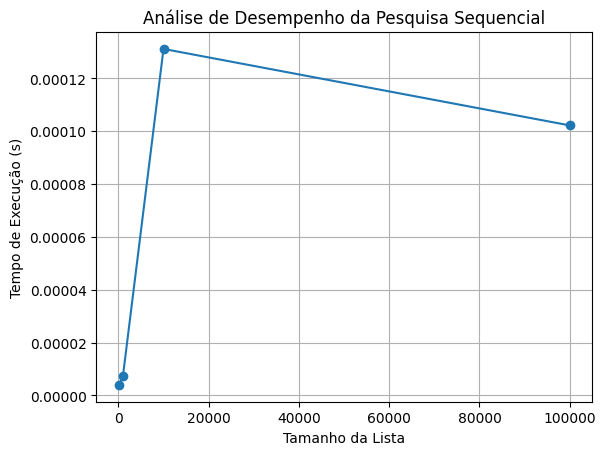

In [ ]:
import timeit
import matplotlib.pyplot as plt
import random

def pesquisa_sequencial(lista, item):
    for elemento in lista:
        if elemento == item:
            return True
    return False

tamanhos_de_lista = [100, 1000, 10000, 100000]
tempos_sequencial = []

for tamanho in tamanhos_de_lista:
    arquivo_ordenado = f'ordenado_{tamanho}.txt'
    lista_ordenada = []

    with open(arquivo_ordenado, 'r') as arquivo:
        lista_ordenada = [int(linha) for linha in arquivo]

    item = random.choice(lista_ordenada)  # Valor a ser pesquisado

    def wrapper():
        pesquisa_sequencial(lista_ordenada, item)

    tempo_sequencial = timeit.timeit(wrapper, number=1)
    tempos_sequencial.append(tempo_sequencial)

    print(f'Tamanho da Lista: {tamanho}, Tempo de Execução (s): {tempo_sequencial}')

plt.plot(tamanhos_de_lista, tempos_sequencial, marker='o')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo de Execução (s)')
plt.title('Análise de Desempenho da Pesquisa Sequencial')
plt.grid(True)
plt.show()




# Pesquisa Sequencial Recursiva
1. `A pesquisa sequencial recursiva` também percorre a lista elemento por elemento até encontrar o item desejado ou chegar ao final da lista.

**Análise de Complexidade Temporal**:

**Melhor caso**: O item é o primeiro elemento da lista (1 operação de comparação).

**Pior caso**: O item não está na lista, e é necessário percorrer todos os elementos (n operações de comparação, onde n é o tamanho da lista).

**Complexidade Temporal (Big-O)**: O(n) no pior caso, onde n é o tamanho da lista.

Tamanho da Lista: 100, Tempo de Execução (s): 2.759000017249491e-05
Tamanho da Lista: 1000, Tempo de Execução (s): 0.0016961000001174398
Tamanho da Lista: 10000, Tempo de Execução (s): 0.39430901400010043


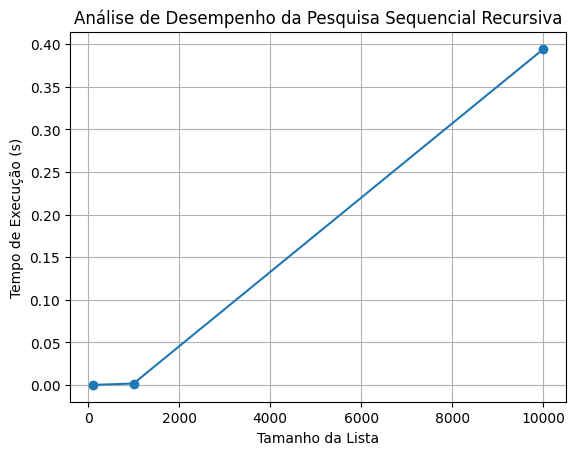

In [ ]:
import timeit
import matplotlib.pyplot as plt
import random
import sys

# Defina a profundidade máxima de recursão desejada
sys.setrecursionlimit(100000)

def pesquisa_sequencial_recursiva(lista, item):
    if not lista:  # Condição de parada: lista vazia, elemento não encontrado
        return False
    if lista[0] == item:
        return True
    return pesquisa_sequencial_recursiva(lista[1:], item)

tamanhos_de_lista = [100, 1000, 10000]
tempos_sequencial_recursiva = []

for tamanho in tamanhos_de_lista:
    arquivo_ordenado = f'ordenado_{tamanho}.txt'
    lista_ordenada = []

    with open(arquivo_ordenado, 'r') as arquivo:
        lista_ordenada = [int(linha) for linha in arquivo]

    item = random.choice(lista_ordenada)  # Valor a ser pesquisado

    def wrapper():
        pesquisa_sequencial_recursiva(lista_ordenada, item)

    tempo_sequencial_recursiva = timeit.timeit(wrapper, number=1)
    tempos_sequencial_recursiva.append(tempo_sequencial_recursiva)

    print(f'Tamanho da Lista: {tamanho}, Tempo de Execução (s): {tempo_sequencial_recursiva}')

plt.plot(tamanhos_de_lista, tempos_sequencial_recursiva, marker='o')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo de Execução (s)')
plt.title('Análise de Desempenho da Pesquisa Sequencial Recursiva')
plt.grid(True)
plt.show()





# Pesquisa Binária
1. `A pesquisa binária` é uma abordagem mais eficiente para listas ordenadas, a lista é dividada pela metade em cada iteração.

**Análise de Complexidade Temporal**:

**Melhor caso**: O item é o primeiro elemento da lista (1 operação de comparação).

**Pior caso**: A lista é dividida ao meio até que o item seja encontrado ou não (log₂(n) operações de comparação, onde n é o tamanho da lista).

**Complexidade Temporal (Big-O)**: O(log n) no pior caso, onde n é o tamanho da lista.

Tamanho da Lista: 100, Tempo de Execução (s): 4.291534423828125e-06
Tamanho da Lista: 1000, Tempo de Execução (s): 5.0067901611328125e-06
Tamanho da Lista: 10000, Tempo de Execução (s): 7.867813110351562e-06
Tamanho da Lista: 100000, Tempo de Execução (s): 2.5033950805664062e-05


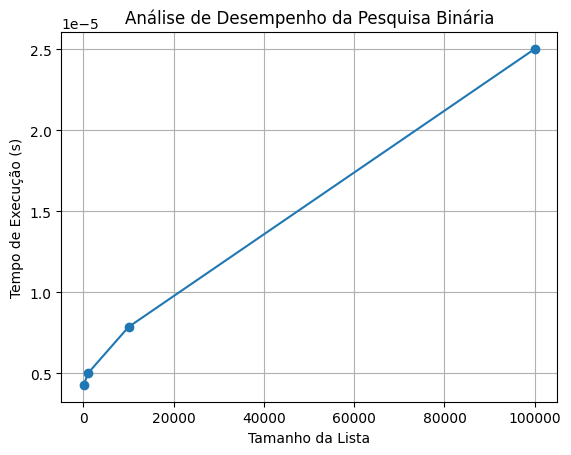

In [ ]:
import time
import matplotlib.pyplot as plt
import random

def pesquisa_binaria(lista, item):
    primeiro = 0
    ultimo = len(lista) - 1
    while primeiro <= ultimo:
        meio = (primeiro + ultimo) // 2
        if lista[meio] == item:
            return True
        else:
            if item < lista[meio]:
                ultimo = meio - 1
            else:
                primeiro = meio + 1
    return False

tamanhos_de_lista = [100, 1000, 10000, 100000]
tempos_binaria = []

for tamanho in tamanhos_de_lista:
    arquivo_ordenado = f'ordenado_{tamanho}.txt'
    lista_ordenada = []

    with open(arquivo_ordenado, 'r') as arquivo:
        lista_ordenada = [int(linha) for linha in arquivo]

    item = random.choice(lista_ordenada)  # Valor a ser pesquisado

    inicio = time.time()
    resultado_binaria = pesquisa_binaria(lista_ordenada, item)
    fim = time.time()
    tempo_binaria = fim - inicio
    tempos_binaria.append(tempo_binaria)

    print(f'Tamanho da Lista: {tamanho}, Tempo de Execução (s): {tempo_binaria}')

plt.plot(tamanhos_de_lista, tempos_binaria, marker='o')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo de Execução (s)')
plt.title('Análise de Desempenho da Pesquisa Binária')
plt.grid(True)
plt.show()


# Pesquisa Binária Recursiva
1. `A pesquisa binária recursiva` também divide a lista pela metade em cada iteração.

**Análise de Complexidade Temporal**:

**Melhor caso**: O item é o primeiro elemento da lista (1 operação de comparação).

**Pior caso**: A lista é dividida ao meio até que o item seja encontrado ou não (log₂(n) operações de comparação, onde n é o tamanho da lista).

**Complexidade Temporal (Big-O)**: O(log n) no pior caso, onde n é o tamanho da lista.

Tamanho da Lista: 100, Tempo de Execução (s): 9.298324584960938e-06
Tamanho da Lista: 1000, Tempo de Execução (s): 1.3828277587890625e-05
Tamanho da Lista: 10000, Tempo de Execução (s): 4.863739013671875e-05


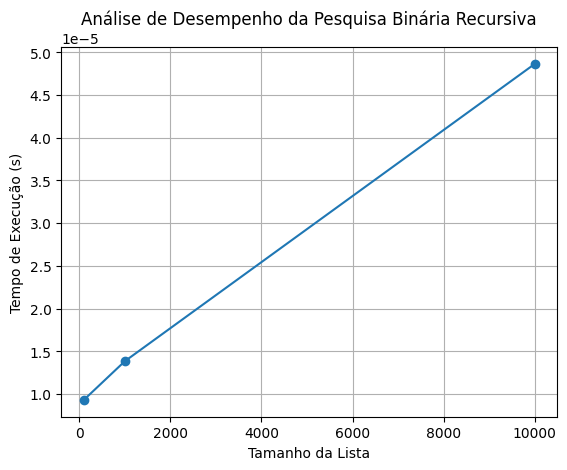

In [ ]:
import time
import matplotlib.pyplot as plt
import random
import sys

sys.setrecursionlimit(10000)

def pesquisa_binaria_recursiva(lista, item):
    if len(lista) == 0:
        return False
    meio = len(lista) // 2
    if lista[meio] == item:
        return True
    elif item < lista[meio]:
        return pesquisa_binaria_recursiva(lista[:meio], item)
    else:
        return pesquisa_binaria_recursiva(lista[meio + 1:], item)

tamanhos_de_lista = [100, 1000, 10000]
tempos_binaria_recursiva = []

for tamanho in tamanhos_de_lista:
    arquivo_ordenado = f'ordenado_{tamanho}.txt'
    lista_ordenada = []

    with open(arquivo_ordenado, 'r') as arquivo:
        lista_ordenada = [int(linha) for linha in arquivo]

    item = random.choice(lista_ordenada)  # Valor a ser pesquisado

    inicio = time.time()
    resultado_binaria_recursiva = pesquisa_binaria_recursiva(lista_ordenada, item)
    fim = time.time()
    tempo_binaria_recursiva = fim - inicio

    tempos_binaria_recursiva.append(tempo_binaria_recursiva)

    print(f'Tamanho da Lista: {tamanho}, Tempo de Execução (s): {tempo_binaria_recursiva}')

plt.plot(tamanhos_de_lista, tempos_binaria_recursiva, marker='o')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo de Execução (s)')
plt.title('Análise de Desempenho da Pesquisa Binária Recursiva')
plt.grid(True)
plt.show()



fazer analise
Avalie a complexidade temporal de cada um destes casos de forma teórica, identificando o Big-O.

#Análise de Complexidade Temporal

Neste estudo, avaliamos a complexidade temporal de quatro algoritmos de pesquisa:

a) **Pesquisa Sequencial Não Ordenada**;

b) **Pesquisa Sequencial Ordenada**;

c) **Pesquisa Binária Não Ordenada**;

d) **Pesquisa Binária Ordenada**.


Apresenta-se os resultados com dois gráficos, com as seguinte configurações:

1) `Sequências não ordenadas`;

2) `Sequências ordenadas`.

Tamanho do Arquivo: 100
Tempo Médio de Execução - Sequencial Não Ordenado: 0.000007 segundos
Tempo Médio de Execução - Binária Não Ordenada: 0.000047 segundos
Tempo Médio de Execução - Sequencial Ordenado: 0.000038 segundos
Tempo Médio de Execução - Binária Ordenada: 0.000053 segundos
Tamanho do Arquivo: 1000
Tempo Médio de Execução - Sequencial Não Ordenado: 0.003082 segundos
Tempo Médio de Execução - Binária Não Ordenada: 0.000043 segundos
Tempo Médio de Execução - Sequencial Ordenado: 0.000035 segundos
Tempo Médio de Execução - Binária Ordenada: 0.000038 segundos
Tamanho do Arquivo: 10000
Tempo Médio de Execução - Sequencial Não Ordenado: 0.448993 segundos
Tempo Médio de Execução - Binária Não Ordenada: 0.000073 segundos
Tempo Médio de Execução - Sequencial Ordenado: 0.001338 segundos
Tempo Médio de Execução - Binária Ordenada: 0.000050 segundos


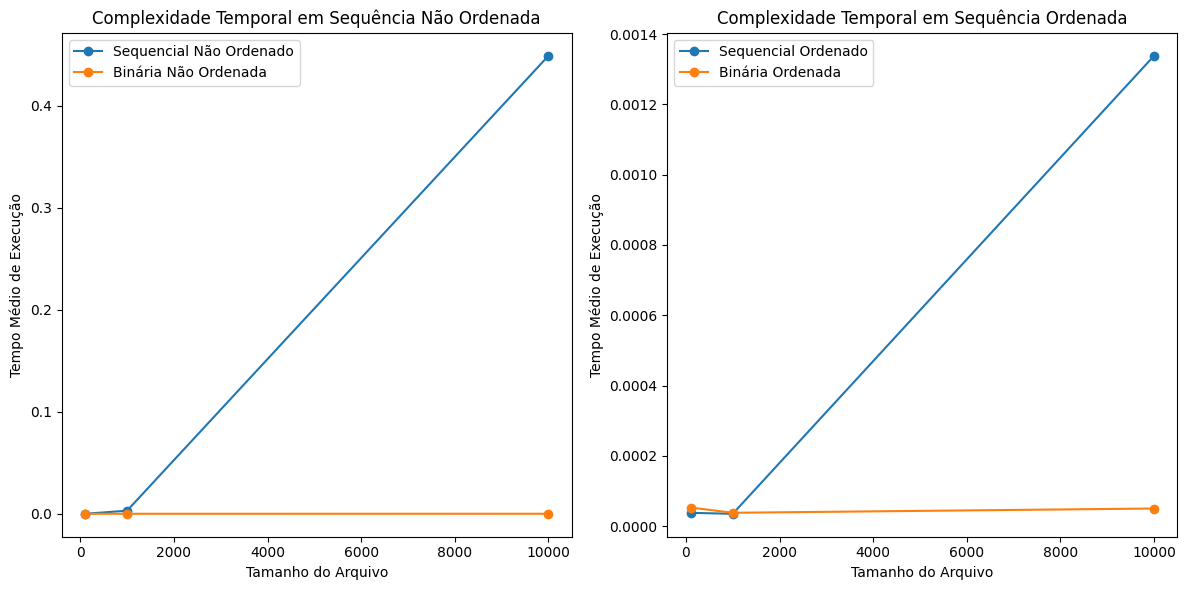

In [ ]:
import random
import pandas as pd
import package_complexidade.analise_complexidade as ac
import matplotlib.pyplot as plt
from package_pesquisa.pesquisa import pesquisa, pesquisa_binaria, pesquisa_sequencial_lista_ordenada
from package_ficheiros.ficheiros import gerar_arquivo_aleatorio, ordenar_arquivo
import sys

sys.setrecursionlimit(100000)

tamanhos_arquivos = [100, 1000, 10000]

tempos_sequencial_nao_ordenado = {}
tempos_binaria_nao_ordenada = {}
tempos_sequencial_ordenado = {}
tempos_binaria_ordenada = {}

for tamanho in tamanhos_arquivos:
    arquivo_aleatorio = f'aleatorio_{tamanho}.txt'
    arquivo_ordenado = f'ordenado_{tamanho}.txt'

    gerar_arquivo_aleatorio(arquivo_aleatorio, tamanho)
    ordenar_arquivo(arquivo_aleatorio, arquivo_ordenado)

    df_aleatorio = pd.read_csv(arquivo_aleatorio, header=None, names=["Numero"])
    df_ordenado = pd.read_csv(arquivo_ordenado, header=None, names=["Numero"])

    item = random.choice(df_aleatorio["Numero"])

    # Tempo médio de pesquisa sequencial em sequência não ordenada
    _, tempo_medio_pesquisa, _ = ac.f_tempo(pesquisa, df_aleatorio["Numero"].tolist(), 3, item)
    tempos_sequencial_nao_ordenado[tamanho] = tempo_medio_pesquisa

    # Tempo médio de pesquisa binária em sequência não ordenada
    _, tempo_medio_binaria_nao_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_aleatorio["Numero"], 3, item)
    tempos_binaria_nao_ordenada[tamanho] = tempo_medio_binaria_nao_ordenada

    # Tempo médio de pesquisa sequencial em sequência ordenada
    _, tempo_medio_sequencial_ordenado, _ = ac.f_tempo(pesquisa_sequencial_lista_ordenada, df_ordenado["Numero"], 3, item)
    tempos_sequencial_ordenado[tamanho] = tempo_medio_sequencial_ordenado

    # Tempo médio de pesquisa binária em sequência ordenada
    _, tempo_medio_binaria_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_ordenado["Numero"], 3, item)
    tempos_binaria_ordenada[tamanho] = tempo_medio_binaria_ordenada

    print(f'Tamanho do Arquivo: {tamanho}')
    print(f'Tempo Médio de Execução - Sequencial Não Ordenado: {tempo_medio_pesquisa:.6f} segundos')
    print(f'Tempo Médio de Execução - Binária Não Ordenada: {tempo_medio_binaria_nao_ordenada:.6f} segundos')
    print(f'Tempo Médio de Execução - Sequencial Ordenado: {tempo_medio_sequencial_ordenado:.6f} segundos')
    print(f'Tempo Médio de Execução - Binária Ordenada: {tempo_medio_binaria_ordenada:.6f} segundos')

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(tamanhos_arquivos, list(tempos_sequencial_nao_ordenado.values()), marker='o', label='Sequencial Não Ordenado')
plt.plot(tamanhos_arquivos, list(tempos_binaria_nao_ordenada.values()), marker='o', label='Binária Não Ordenada')
plt.xlabel('Tamanho do Arquivo')
plt.ylabel('Tempo Médio de Execução')
plt.title('Complexidade Temporal em Sequência Não Ordenada')
plt.legend()

plt.subplot(122)
plt.plot(tamanhos_arquivos, list(tempos_sequencial_ordenado.values()), marker='o', label='Sequencial Ordenado')
plt.plot(tamanhos_arquivos, list(tempos_binaria_ordenada.values()), marker='o', label='Binária Ordenada')
plt.xlabel('Tamanho do Arquivo')
plt.ylabel('Tempo Médio de Execução')
plt.title('Complexidade Temporal em Sequência Ordenada')
plt.legend()

plt.tight_layout()
plt.show()







## Avaliação da Complexidade Temporal em Pesquisas

Esta experiência visa avaliar a complexidade temporal de diferentes algoritmos de pesquisa, considerando três cenários distintos: `melhor caso`, `pior caso` e `caso intermédio`.

- **Melhor Caso**: Este cenário representa a situação ideal, em que a pesquisa é mais eficiente. Nesta pesquisa, consideraremos o primeiro elemento da lista como o item a ser encontrado.

- **Pior Caso**: O pior caso é aquele em que a pesquisa é menos eficiente e envolve a maior quantidade de comparações. Nesta pesquisa, consideraremos o pior caso como a tentativa de encontrar o último número da lista, tornando a pesquisa o mais ineficiente possível.

- **Caso Intermédio**: O caso intermédio está entre o melhor e o pior caso, procura representar uma situação realista. Para esse cenário, escolhemos um número que está no meio da lista como o alvo da pesquisa.

Esta experiência irá avaliar como diferentes algoritmos de pesquisa (pesquisa sequencial e pesquisa binária) se comportam em relação a esses três cenários, com duas configurações: **sequência ordenada** e **sequência não ordenada**.

Vamos criar dados e traçar gráficos para visualizar como o desempenho dos algoritmos varia em cada um desses cenários. Esta análise permitirá entender melhor a eficácia de cada algoritmo e em que circunstâncias eles são mais adequados.


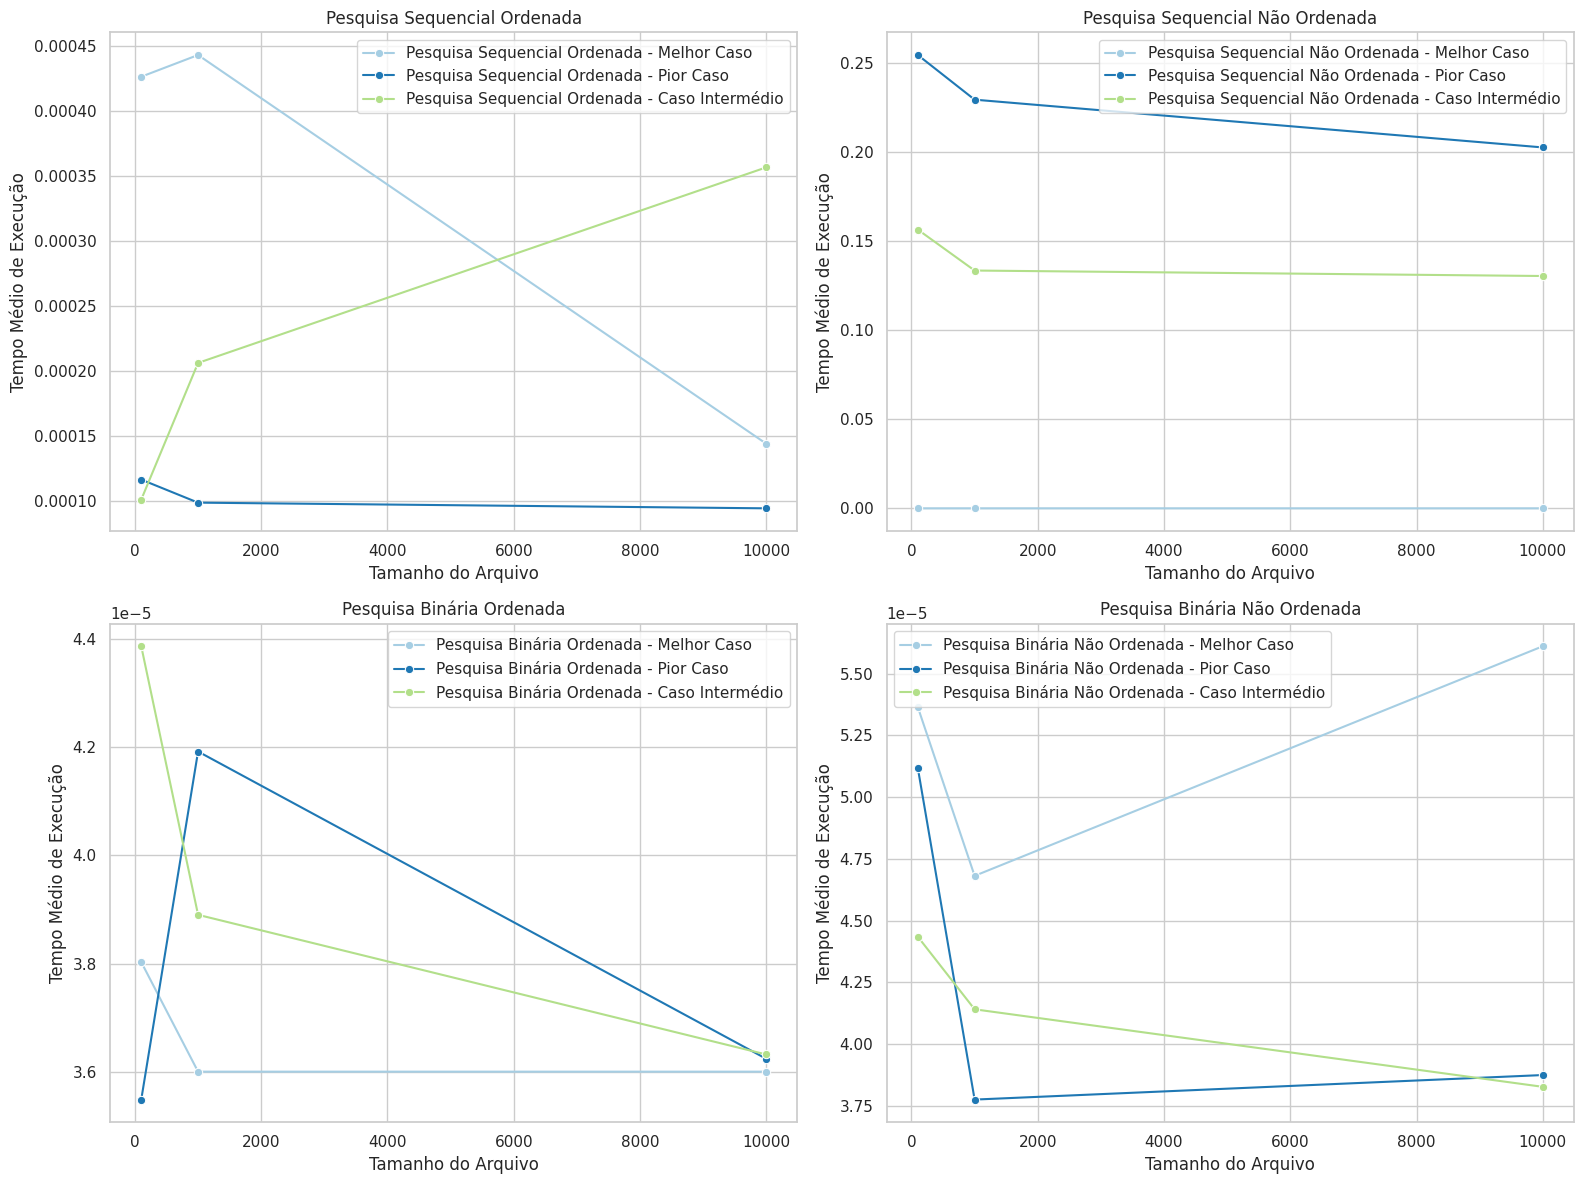

In [ ]:
%matplotlib inline
import random
import pandas as pd
import package_complexidade.analise_complexidade as ac
import matplotlib.pyplot as plt
import seaborn as sns
from package_pesquisa.pesquisa import pesquisa, pesquisa_binaria, pesquisa_sequencial_lista_ordenada
from package_ficheiros.ficheiros import gerar_arquivo_aleatorio, ordenar_arquivo
import sys

sys.setrecursionlimit(100000)

tamanhos_arquivos = [100, 1000, 10000]

num_passagens = 3

tempos_passagens = {"Pesquisa Sequencial Não Ordenada": {"Melhor Caso": [[] for _ in range(num_passagens)],
                                                        "Pior Caso": [[] for _ in range(num_passagens)],
                                                        "Caso Intermédio": [[] for _ in range(num_passagens)]},
                   "Pesquisa Sequencial Ordenada": {"Melhor Caso": [[] for _ in range(num_passagens)],
                                                  "Pior Caso": [[] for _ in range(num_passagens)],
                                                  "Caso Intermédio": [[] for _ in range(num_passagens)]},
                   "Pesquisa Binária Não Ordenada": {"Melhor Caso": [[] for _ in range(num_passagens)],
                                                    "Pior Caso": [[] for _ in range(num_passagens)],
                                                    "Caso Intermédio": [[] for _ in range(num_passagens)]},
                   "Pesquisa Binária Ordenada": {"Melhor Caso": [[] for _ in range(num_passagens)],
                                                "Pior Caso": [[] for _ in range(num_passagens)],
                                                "Caso Intermédio": [[] for _ in range(num_passagens)]}}

for tamanho in tamanhos_arquivos:
    for passagem in range(num_passagens):
        arquivo_aleatorio = f'aleatorio_{tamanho}.txt'
        arquivo_ordenado = f'ordenado_{tamanho}.txt'

        gerar_arquivo_aleatorio(arquivo_aleatorio, tamanho)
        ordenar_arquivo(arquivo_aleatorio, arquivo_ordenado)

        df_aleatorio = pd.read_csv(arquivo_aleatorio, header=None, names=["Numero"])
        df_ordenado = pd.read_csv(arquivo_ordenado, header=None, names=["Numero"])

        item_melhor_caso = df_aleatorio["Numero"].iloc[0]  # Primeiro valor da lista
        item_pior_caso = df_aleatorio["Numero"].iloc[-1]  # Último valor da lista
        item_intermédio = df_aleatorio["Numero"].iloc[len(df_aleatorio) // 2]  # Valor aleatório da lista

        # Pesquisa Sequencial Não Ordenada
        _, tempo_medio_melhor_caso_sequencial, _ = ac.f_tempo(pesquisa, df_aleatorio["Numero"].tolist(), 2, item_melhor_caso)
        _, tempo_medio_pior_caso_sequencial, _ = ac.f_tempo(pesquisa, df_aleatorio["Numero"].tolist(), 2, item_pior_caso)
        _, tempo_medio_intermédio_sequencial, _ = ac.f_tempo(pesquisa, df_aleatorio["Numero"].tolist(), 2, item_intermédio)

        tempos_passagens["Pesquisa Sequencial Não Ordenada"]["Melhor Caso"][passagem].append(tempo_medio_melhor_caso_sequencial)
        tempos_passagens["Pesquisa Sequencial Não Ordenada"]["Pior Caso"][passagem].append(tempo_medio_pior_caso_sequencial)
        tempos_passagens["Pesquisa Sequencial Não Ordenada"]["Caso Intermédio"][passagem].append(tempo_medio_intermédio_sequencial)

        # Pesquisa Sequencial Ordenada
        _, tempo_medio_melhor_caso_sequencial_ordenado, _ = ac.f_tempo(pesquisa_sequencial_lista_ordenada, df_ordenado["Numero"], 2,
                                                                      item_melhor_caso)
        _, tempo_medio_pior_caso_sequencial_ordenado, _ = ac.f_tempo(pesquisa_sequencial_lista_ordenada, df_ordenado["Numero"],
                                                                     2, item_pior_caso)
        _, tempo_medio_intermédio_sequencial_ordenado, _ = ac.f_tempo(pesquisa_sequencial_lista_ordenada,
                                                                         df_ordenado["Numero"], 2, item_intermédio)

        tempos_passagens["Pesquisa Sequencial Ordenada"]["Melhor Caso"][passagem].append(tempo_medio_melhor_caso_sequencial_ordenado)
        tempos_passagens["Pesquisa Sequencial Ordenada"]["Pior Caso"][passagem].append(tempo_medio_pior_caso_sequencial_ordenado)
        tempos_passagens["Pesquisa Sequencial Ordenada"]["Caso Intermédio"][passagem].append(tempo_medio_intermédio_sequencial_ordenado)

        # Pesquisa Binária Não Ordenada
        _, tempo_medio_melhor_caso_binaria, _ = ac.f_tempo(pesquisa_binaria, df_aleatorio["Numero"], 2, item_melhor_caso)
        _, tempo_medio_pior_caso_binaria, _ = ac.f_tempo(pesquisa_binaria, df_aleatorio["Numero"], 2, item_pior_caso)
        _, tempo_medio_intermédio_binaria, _ = ac.f_tempo(pesquisa_binaria, df_aleatorio["Numero"], 2, item_intermédio)

        tempos_passagens["Pesquisa Binária Não Ordenada"]["Melhor Caso"][passagem].append(tempo_medio_melhor_caso_binaria)
        tempos_passagens["Pesquisa Binária Não Ordenada"]["Pior Caso"][passagem].append(tempo_medio_pior_caso_binaria)
        tempos_passagens["Pesquisa Binária Não Ordenada"]["Caso Intermédio"][passagem].append(tempo_medio_intermédio_binaria)

        # Pesquisa Binária Ordenada
        _, tempo_medio_melhor_caso_binaria_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_ordenado["Numero"], 2, item_melhor_caso)
        _, tempo_medio_pior_caso_binaria_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_ordenado["Numero"], 2, item_pior_caso)
        _, tempo_medio_intermédio_binaria_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_ordenado["Numero"], 2,
                                                                       item_intermédio)

        tempos_passagens["Pesquisa Binária Ordenada"]["Melhor Caso"][passagem].append(tempo_medio_melhor_caso_binaria_ordenada)
        tempos_passagens["Pesquisa Binária Ordenada"]["Pior Caso"][passagem].append(tempo_medio_pior_caso_binaria_ordenada)
        tempos_passagens["Pesquisa Binária Ordenada"]["Caso Intermédio"][passagem].append(tempo_medio_intermédio_binaria_ordenada)


medias_tempos = {}

for algoritmo in tempos_passagens:
    medias_tempos[algoritmo] = {}
    for cenário in tempos_passagens[algoritmo]:
        medias_tempos[algoritmo][cenário] = [sum(passagem) / num_passagens for passagem in tempos_passagens[algoritmo][cenário]]


sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Gráfico para pesquisa sequencial em lista ordenada (Melhor, Pior, Intermédio)
plt.subplot(221)
colors = sns.color_palette("Paired")
for i, cenário in enumerate(["Melhor Caso", "Pior Caso", "Caso Intermédio"]):
    sns.lineplot(x=tamanhos_arquivos, y=medias_tempos["Pesquisa Sequencial Ordenada"][cenário], marker='o', label=f'Pesquisa Sequencial Ordenada - {cenário}', color=colors[i])

plt.xlabel('Tamanho do Arquivo')
plt.ylabel('Tempo Médio de Execução')
plt.title('Pesquisa Sequencial Ordenada')
plt.legend()

# Gráfico para pesquisa sequencial em lista não ordenada (Melhor, Pior, Intermédio)
plt.subplot(222)
colors = sns.color_palette("Paired")
for i, cenário in enumerate(["Melhor Caso", "Pior Caso", "Caso Intermédio"]):
    sns.lineplot(x=tamanhos_arquivos, y=medias_tempos["Pesquisa Sequencial Não Ordenada"][cenário], marker='o', label=f'Pesquisa Sequencial Não Ordenada - {cenário}', color=colors[i])

plt.xlabel('Tamanho do Arquivo')
plt.ylabel('Tempo Médio de Execução')
plt.title('Pesquisa Sequencial Não Ordenada')
plt.legend()

# Gráfico para pesquisa binária em lista ordenada (Melhor, Pior, Intermédio)
plt.subplot(223)
colors = sns.color_palette("Paired")
for i, cenário in enumerate(["Melhor Caso", "Pior Caso", "Caso Intermédio"]):
    sns.lineplot(x=tamanhos_arquivos, y=medias_tempos["Pesquisa Binária Ordenada"][cenário], marker='o', label=f'Pesquisa Binária Ordenada - {cenário}', color=colors[i])

plt.xlabel('Tamanho do Arquivo')
plt.ylabel('Tempo Médio de Execução')
plt.title('Pesquisa Binária Ordenada')
plt.legend()

# Gráfico para pesquisa binária em lista não ordenada (Melhor, Pior, Intermédio)
plt.subplot(224)
colors = sns.color_palette("Paired")
for i, cenário in enumerate(["Melhor Caso", "Pior Caso", "Caso Intermédio"]):
    sns.lineplot(x=tamanhos_arquivos, y=medias_tempos["Pesquisa Binária Não Ordenada"][cenário], marker='o', label=f'Pesquisa Binária Não Ordenada - {cenário}', color=colors[i])

plt.xlabel('Tamanho do Arquivo')
plt.ylabel('Tempo Médio de Execução')
plt.title('Pesquisa Binária Não Ordenada')
plt.legend()

plt.tight_layout()
plt.show()




In [ ]:
import random
import pandas as pd
import package_complexidade.analise_complexidade as ac
import sys
import statistics

sys.setrecursionlimit(100000)
tamanhos_arquivos = [100, 1000, 10000]
num_passagens = 3

# Dicionários para armazenar os tempos médios de cada passagem
tempos_passagens = {"Pesquisa Sequencial Não Ordenada": {"Melhor Caso": [], "Pior Caso": [], "Caso Intermédio": []},
                   "Pesquisa Sequencial Ordenada": {"Melhor Caso": [], "Pior Caso": [], "Caso Intermédio": []},
                   "Pesquisa Binária Não Ordenada": {"Melhor Caso": [], "Pior Caso": [], "Caso Intermédio": []},
                   "Pesquisa Binária Ordenada": {"Melhor Caso": [], "Pior Caso": [], "Caso Intermédio": []}}

for tamanho in tamanhos_arquivos:
    for passagem in range(num_passagens):
        arquivo_aleatorio = f'aleatorio_{tamanho}.txt'
        arquivo_ordenado = f'ordenado_{tamanho}.txt'

        gerar_arquivo_aleatorio(arquivo_aleatorio, tamanho)
        ordenar_arquivo(arquivo_aleatorio, arquivo_ordenado)

        df_aleatorio = pd.read_csv(arquivo_aleatorio, header=None, names=["Numero"])
        df_ordenado = pd.read_csv(arquivo_ordenado, header=None, names=["Numero"])

        item_melhor_caso = df_aleatorio["Numero"].iloc[0]  # Primeiro valor da lista
        item_pior_caso = df_aleatorio["Numero"].iloc[-1]  # Último valor da lista
        item_intermédio = df_aleatorio["Numero"].iloc[len(df_aleatorio) // 2]  # Valor aleatório da lista

        # Pesquisa Sequencial Não Ordenada
        _, tempo_medio_melhor_caso_sequencial, _ = ac.f_tempo(pesquisa, df_aleatorio["Numero"].tolist(), 3, item_melhor_caso)
        _, tempo_medio_pior_caso_sequencial, _ = ac.f_tempo(pesquisa, df_aleatorio["Numero"].tolist(), 3, item_pior_caso)
        _, tempo_medio_intermédio_sequencial, _ = ac.f_tempo(pesquisa, df_aleatorio["Numero"].tolist(), 3, item_intermédio)

        tempos_passagens["Pesquisa Sequencial Não Ordenada"]["Melhor Caso"].append(tempo_medio_melhor_caso_sequencial)
        tempos_passagens["Pesquisa Sequencial Não Ordenada"]["Pior Caso"].append(tempo_medio_pior_caso_sequencial)
        tempos_passagens["Pesquisa Sequencial Não Ordenada"]["Caso Intermédio"].append(tempo_medio_intermédio_sequencial)

        # Pesquisa Sequencial Ordenada
        _, tempo_medio_melhor_caso_sequencial_ordenado, _ = ac.f_tempo(pesquisa_sequencial_lista_ordenada, df_ordenado["Numero"], 3,
                                                                      item_melhor_caso)
        _, tempo_medio_pior_caso_sequencial_ordenado, _ = ac.f_tempo(pesquisa_sequencial_lista_ordenada, df_ordenado["Numero"],
                                                                     3, item_pior_caso)
        _, tempo_medio_intermédio_sequencial_ordenado, _ = ac.f_tempo(pesquisa_sequencial_lista_ordenada,
                                                                         df_ordenado["Numero"], 3, item_intermédio)

        tempos_passagens["Pesquisa Sequencial Ordenada"]["Melhor Caso"].append(tempo_medio_melhor_caso_sequencial_ordenado)
        tempos_passagens["Pesquisa Sequencial Ordenada"]["Pior Caso"].append(tempo_medio_pior_caso_sequencial_ordenado)
        tempos_passagens["Pesquisa Sequencial Ordenada"]["Caso Intermédio"].append(tempo_medio_intermédio_sequencial_ordenado)

        # Pesquisa Binária Não Ordenada
        _, tempo_medio_melhor_caso_binaria, _ = ac.f_tempo(pesquisa_binaria, df_aleatorio["Numero"], 3, item_melhor_caso)
        _, tempo_medio_pior_caso_binaria, _ = ac.f_tempo(pesquisa_binaria, df_aleatorio["Numero"], 3, item_pior_caso)
        _, tempo_medio_intermédio_binaria, _ = ac.f_tempo(pesquisa_binaria, df_aleatorio["Numero"], 3, item_intermédio)

        tempos_passagens["Pesquisa Binária Não Ordenada"]["Melhor Caso"].append(tempo_medio_melhor_caso_binaria)
        tempos_passagens["Pesquisa Binária Não Ordenada"]["Pior Caso"].append(tempo_medio_pior_caso_binaria)
        tempos_passagens["Pesquisa Binária Não Ordenada"]["Caso Intermédio"].append(tempo_medio_intermédio_binaria)

        # Pesquisa Binária Ordenada
        _, tempo_medio_melhor_caso_binaria_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_ordenado["Numero"], 3, item_melhor_caso)
        _, tempo_medio_pior_caso_binaria_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_ordenado["Numero"], 3, item_pior_caso)
        _, tempo_medio_intermédio_binaria_ordenada, _ = ac.f_tempo(pesquisa_binaria, df_ordenado["Numero"], 3,
                                                                       item_intermédio)

        tempos_passagens["Pesquisa Binária Ordenada"]["Melhor Caso"].append(tempo_medio_melhor_caso_binaria_ordenada)
        tempos_passagens["Pesquisa Binária Ordenada"]["Pior Caso"].append(tempo_medio_pior_caso_binaria_ordenada)
        tempos_passagens["Pesquisa Binária Ordenada"]["Caso Intermédio"].append(tempo_medio_intermédio_binaria_ordenada)


medias_tempos = {}

for algoritmo in tempos_passagens:
    medias_tempos[algoritmo] = {}
    for cenário in tempos_passagens[algoritmo]:
        if tempos_passagens[algoritmo][cenário]:
            tempos_passagens_cenário = tempos_passagens[algoritmo][cenário]
            medias_tempos[algoritmo][cenário] = {
                "Média": statistics.mean(tempos_passagens_cenário),
                "Mediana": statistics.median(tempos_passagens_cenário),
                "Desvio Padrão": statistics.stdev(tempos_passagens_cenário),
                "Mínimo": min(tempos_passagens_cenário),
                "Máximo": max(tempos_passagens_cenário)
            }

for algoritmo in medias_tempos:
    print(f'=== {algoritmo} ===')
    for cenário in medias_tempos[algoritmo]:
        if medias_tempos[algoritmo][cenário]:
            print(f'{cenário}:')
            estatisticas = medias_tempos[algoritmo][cenário]
            print(f'Média: {estatisticas["Média"]:.5f}')
            print(f'Mediana: {estatisticas["Mediana"]:.5f}')
            print(f'Desvio Padrão: {estatisticas["Desvio Padrão"]:.5f}')
            print(f'Mínimo: {estatisticas["Mínimo"]:.5f}')
            print(f'Máximo: {estatisticas["Máximo"]:.5f}')
            print()




=== Pesquisa Sequencial Não Ordenada ===
Melhor Caso:
Média: 0.00000
Mediana: 0.00000
Desvio Padrão: 0.00000
Mínimo: 0.00000
Máximo: 0.00000

Pior Caso:
Média: 0.23951
Mediana: 0.00440
Desvio Padrão: 0.36042
Mínimo: 0.00004
Máximo: 0.80560

Caso Intermédio:
Média: 0.11730
Mediana: 0.00304
Desvio Padrão: 0.17434
Mínimo: 0.00001
Máximo: 0.36747

=== Pesquisa Sequencial Ordenada ===
Melhor Caso:
Média: 0.00044
Mediana: 0.00020
Desvio Padrão: 0.00060
Mínimo: 0.00001
Máximo: 0.00174

Pior Caso:
Média: 0.00024
Mediana: 0.00012
Desvio Padrão: 0.00036
Mínimo: 0.00000
Máximo: 0.00113

Caso Intermédio:
Média: 0.00033
Mediana: 0.00012
Desvio Padrão: 0.00047
Mínimo: 0.00001
Máximo: 0.00140

=== Pesquisa Binária Não Ordenada ===
Melhor Caso:
Média: 0.00006
Mediana: 0.00006
Desvio Padrão: 0.00002
Mínimo: 0.00003
Máximo: 0.00010

Pior Caso:
Média: 0.00006
Mediana: 0.00005
Desvio Padrão: 0.00002
Mínimo: 0.00002
Máximo: 0.00008

Caso Intermédio:
Média: 0.00008
Mediana: 0.00006
Desvio Padrão: 0.00006
Mí

## Análise e Discussão

Durante a análise, podemos observar que o desempenho dos algoritmos de pesquisa é afetado por diferentes cenários e características das listas, incluindo a ordenação ou não dos elementos.


 **`observações gerais:`**

### Pesquisa Sequencial Não Ordenada

- No **pior caso**, a pesquisa sequencial não ordenada é ineficiente, pois requer a verificação de todos os elementos da lista.
- O tempo médio é substancialmente maior no **pior caso**, o que torna essa opção desfavorável para listas longas e desordenadas.

### Pesquisa Sequencial Ordenada

- A pesquisa sequencial em uma lista ordenada apresenta um desempenho significativamente melhor no **pior caso**, em comparação com a versão não ordenada.
- Isso ocorre porque a ordenação permite que a pesquisa seja interrompida assim que o elemento desejado for encontrado.

### Pesquisa Binária Não Ordenada e Ordenada

- A pesquisa binária, tanto em listas ordenadas quanto em listas não ordenadas, tende a demonstrar tempos médios bastante semelhantes.
- No entanto, a pesquisa binária beneficia consideravelmente da ordenação no caso das listas ordenadas, tornando-a uma escolha sólida nesse cenário.

Em resumo, os resultados destacam a importância de selecionar o algoritmo de pesquisa apropriado com base nas características da lista e no cenário específico. A ordenação desempenha um papel crítico na eficiência dos algoritmos, especialmente para listas ordenadas, onde a pesquisa binária destaca-se como uma opção eficiente.
